# Market Segmentation

In this case study, we are performing Market Segmentation to identify distinct group of customers of a bank in the New York city. 

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Import the Data Set

In [5]:
market= pd.read_csv("C:\\Users\\kava2\\Documents\\Udemy\\Data Science for Business\\2. Marketing Department\\Marketing_Data.csv")

In [6]:
# Peek look at the data set
market.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# Dimensions of the data set
market.shape

(8950, 18)

In [8]:
# Explore the variables
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [9]:
# Get the statistical description of the data
market.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# Maximum oneoff purchase is $40761. Let us see who made that purchase
market[market['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
# Let us see who is the customer that has done the maximum cash advance
print(market['CASH_ADVANCE'].max())

47137.211760000006


In [12]:
market[market['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


---

## EDA and Data Visulization

In [13]:
# Let's see if we have any missing data. Luckily we don't
market.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# Fill the missing values in the above 2 columns with the average values of the columns
market.loc[(market['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']= market['MINIMUM_PAYMENTS'].mean()
market.loc[(market['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']= market['CREDIT_LIMIT'].mean()

# Check if the null values are replaced with the mean
market.isnull().sum()                                  # The null values are replaced by mean

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
# Let us see if we have any duplicated columns; We do not.
market.duplicated().sum()

0

In [16]:
# Let us drop the Customer_ID column since it does not contribute to our analysis
market.drop('CUST_ID', axis=1, inplace=True)

In [17]:
# Check if the column is dropped
market.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


---

We shall now plot 

* Distplot- distplot is a combination of the matplotlib's hist and seaborn's kdeplot
* KDEPlot refers to the Kernel Density Estimate plot that plot the probability of a continuous variable at various points

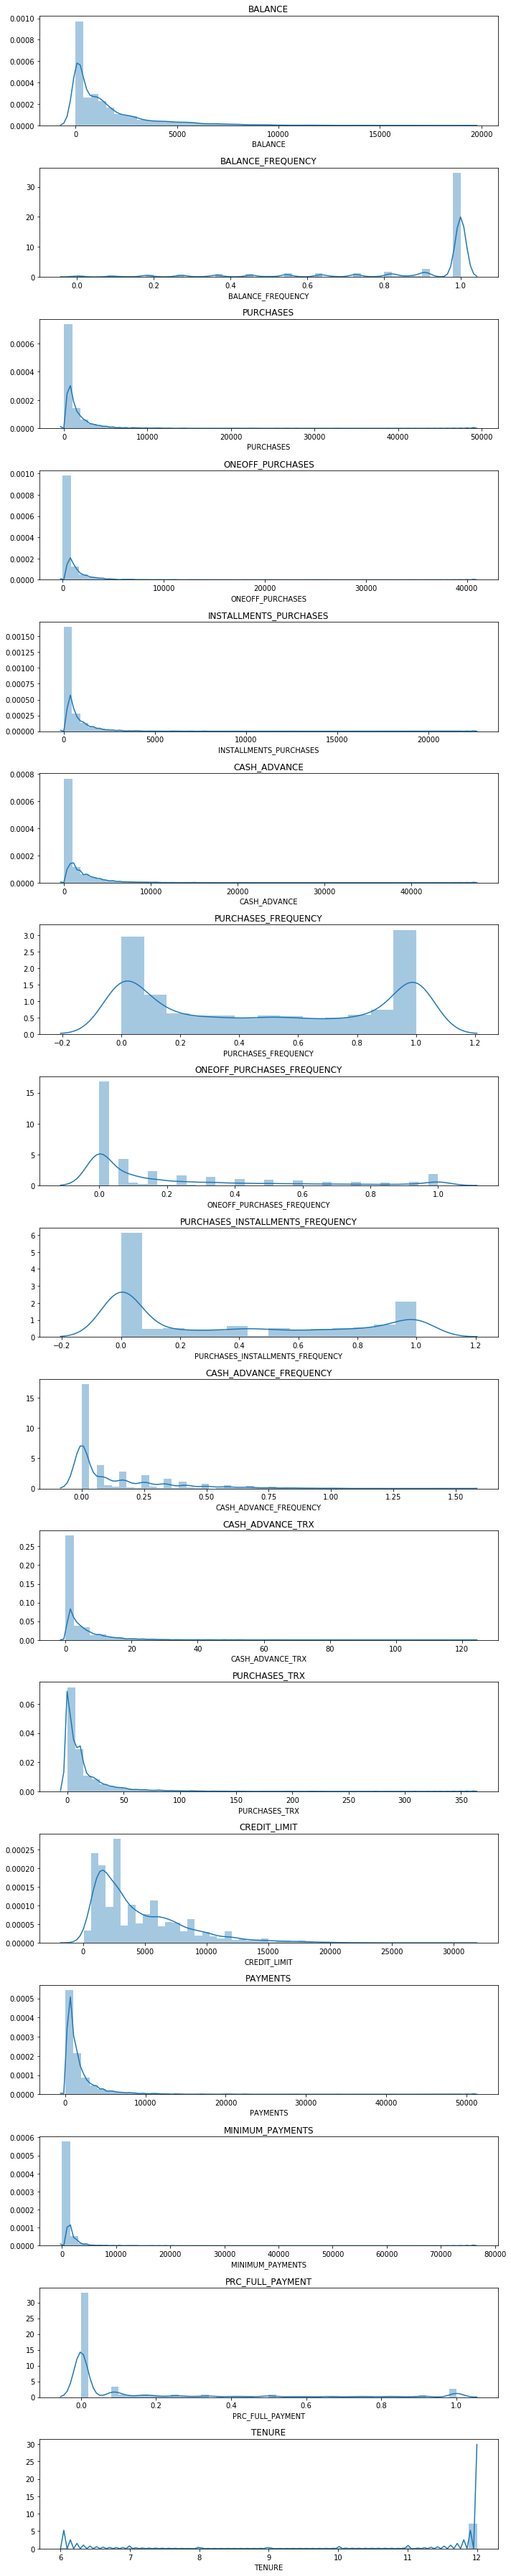

In [18]:
# Let us now plot the distplot
plt.figure(figsize=(10, 50))
for i in range(len(market.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(market[market.columns[i]])
    plt.title(market.columns[i])
    
plt.tight_layout()

We can observe from the above plots:

* Most of the customers seem to have a Balance in the range $0 - $1500
* A large majority of the customers update their Balance frequently
* Most customers pay in small installments

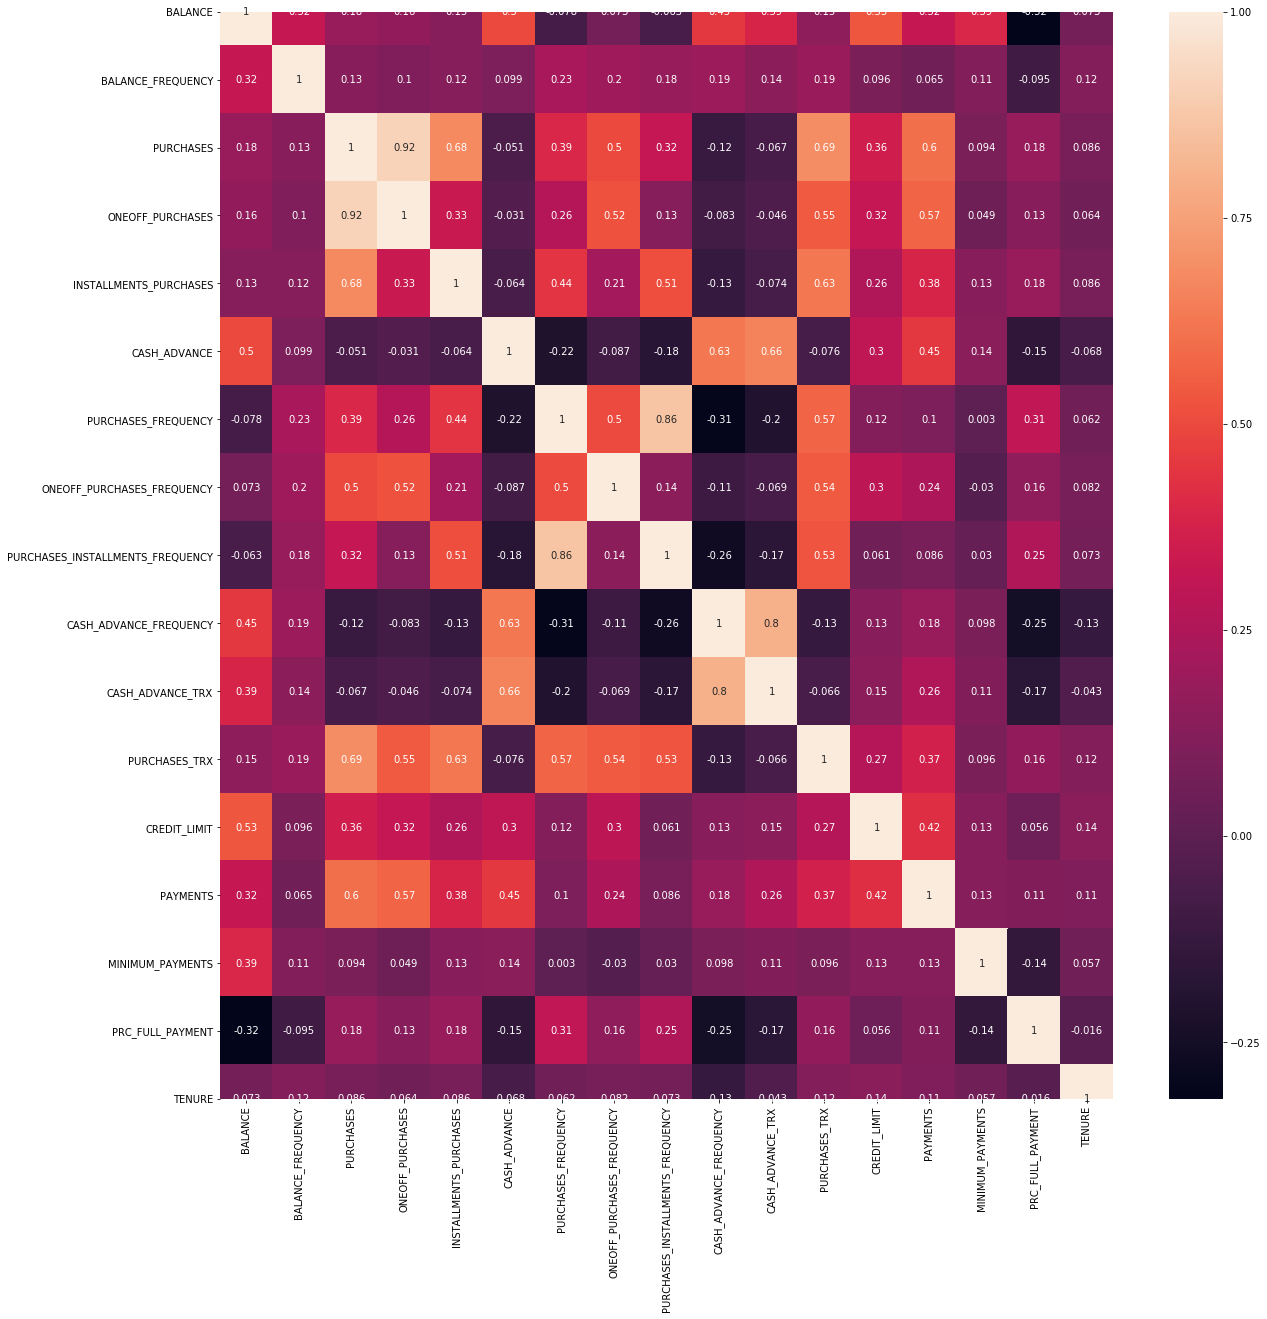

In [19]:
# Let us plot the correlation among various variables
plt.figure(figsize=(20,20))
correlations= market.corr()
sns.heatmap(correlations, annot=True)

We can observe from the above Correlation plot that:

* There is a strong correlation between Purchases, Oneoff purchases and Installment Purchases.
* There also seems to be a correlation between Purchases, Credit limit and Payments.

---

## Find the Optimal Number of Clusters to Apply K-Means Clustering

In [20]:
# Let us scale the data first
scaler= StandardScaler()
market_scaled=scaler.fit_transform(market)

In [21]:
# Dimensions of the scaled data
market_scaled.shape

(8950, 17)

In [22]:
# Let us look at the range of the scaled data
market_scaled.max(), market_scaled.min()

(32.415090469898175, -4.12276756834523)

In [23]:
# Peek look at the scaled data
market_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
# Get the Within Cluster Sum of Squares (WCSS) into an array; Our goal is to get 'k' that minimizes the WCSS
scores = []


for i in range(1,20):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(market_scaled)
    scores.append(kmeans.inertia_)            # kmeans.inertia_ method minimizes the WCSS    

Text(0, 0.5, 'WCSS Score')

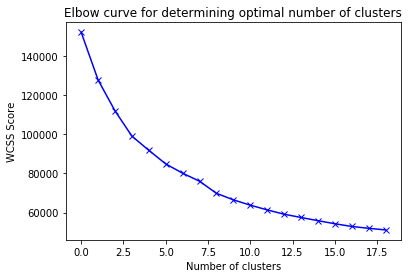

In [25]:
# Plot the elbow curve to determine the optimal number of clusters
plt.plot(scores, 'bx-')                 # Blue color applied to data,x with dashed lines
plt.title("Elbow curve for determining optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS Score")

We can see from the elbow plot that the optimal number of clusters lies somewhere between 7 and 8. We shall choose 8 number of clusters for our K-means clustering.

---

## Apply K-Means Method

In [26]:
kmeans= KMeans(8)
kmeans.fit_transform(market_scaled)
labels= kmeans.labels_

In [27]:
labels

array([6, 5, 0, ..., 2, 2, 2])

In [28]:
labels.shape

(8950,)

In [29]:
# Get the maximum and minimum of labels
labels.max(), labels.min()

(7, 0)

In [30]:
# Get the dimensions of the k-clusters
kmeans.cluster_centers_.shape

(8, 17)

In [31]:
# Get the k-cluster centers
cluster_centers= pd.DataFrame(data=kmeans.cluster_centers_, columns=[market.columns])

In [32]:
# Peek look at the cluster centers
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.165253,0.392196,0.453349,0.593167,-0.017967,-0.333914,0.943302,1.878357,0.089014,-0.407665,-0.323378,0.523732,0.373578,0.086557,-0.162605,0.406347,0.261047
1,-0.364778,0.333613,-0.037381,-0.244339,0.360316,-0.363589,0.990669,-0.387079,1.206081,-0.475238,-0.361153,0.187666,-0.260925,-0.216886,-0.032660,0.313849,0.257637
2,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
3,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341
6,0.019493,0.403153,-0.361863,-0.246971,-0.401779,-0.086621,-0.867503,-0.410513,-0.758672,0.115631,-0.020700,-0.486861,-0.305126,-0.248169,-0.008412,-0.456474,0.271801
7,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182


In [33]:
# To interpret what these clusters mean, let us perform inverse transformtion
cluster_centers= scaler.inverse_transform(cluster_centers)
cluster_centers= pd.DataFrame(data=cluster_centers, columns=[market.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
1,805.220083,0.956301,923.338824,186.885283,736.896637,216.408238,0.887954,0.086985,0.843765,0.040044,0.784226,19.374504,3545.099307,1105.280930,788.094852,0.245510,11.862103
2,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
3,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
6,1605.047605,0.972774,230.077907,182.515426,47.744156,797.223294,0.142179,0.079994,0.062922,0.158283,3.107562,2.608297,3384.275575,1014.718178,844.603245,0.020204,11.881057
7,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539


---

## From the above cluster information, we can deduce the following:

* Cluster 1: REVOLVERS - Use credit card for most transactions, high 
* Cluster 2: TRANSACTORS - Low balance, spend cautiously, pay low interest amount.
* Cluster 3: SMALL AND MEDIUM MERCHANTS- High cash advance, high credit limit, low purchase frequency
* Cluster 4: SPENDERS- Low balance, high purchases, low cash advance, high credit limit
* Cluster 5: LARGE BUSINESSES- High balance, high purchases, highest credit limit and payments and transaction frequency
* Cluster 6: STUDENTS/PASSIVE CUSTOMERS-Lowest purchase frequency and minimum payments, lowest balance  
* Cluster 7: LOW TENURE- Low tenure, low balance
* Cluster 8: VIP- High balance, credit limit and full payment

---

In [34]:
# Let us concatenate the labels of the clusters with our original data frame
market_cluster= pd.concat([market, pd.DataFrame({'cluster': labels})], axis=1)

market_cluster.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0


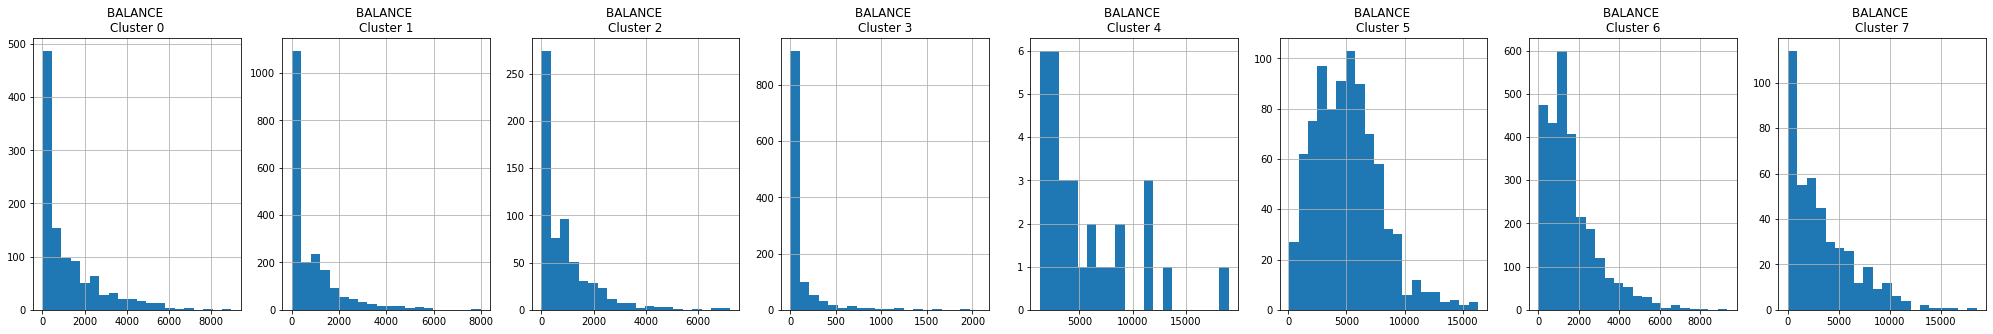

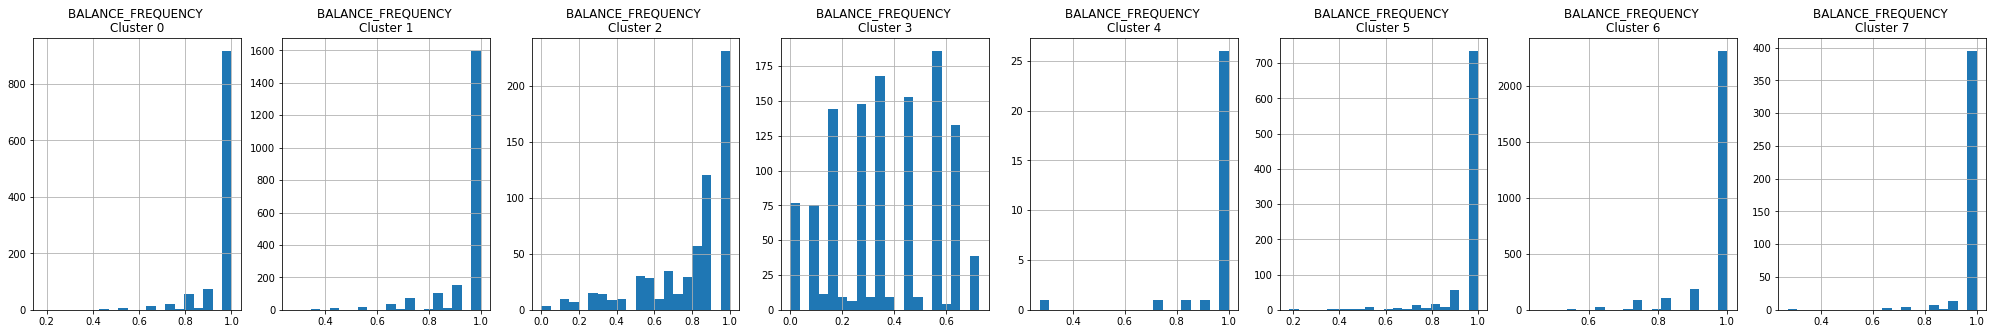

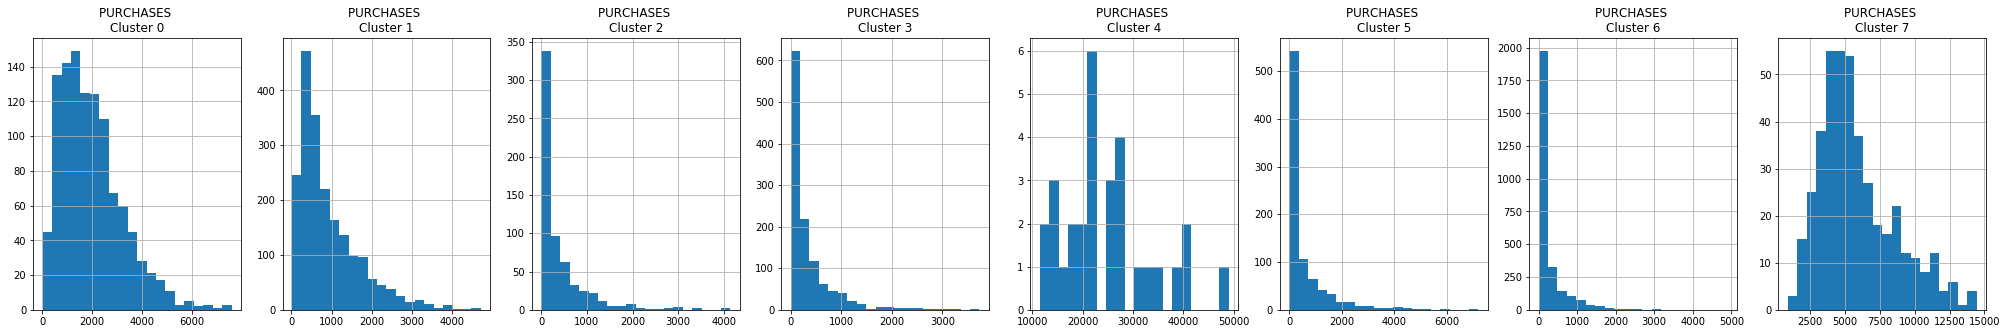

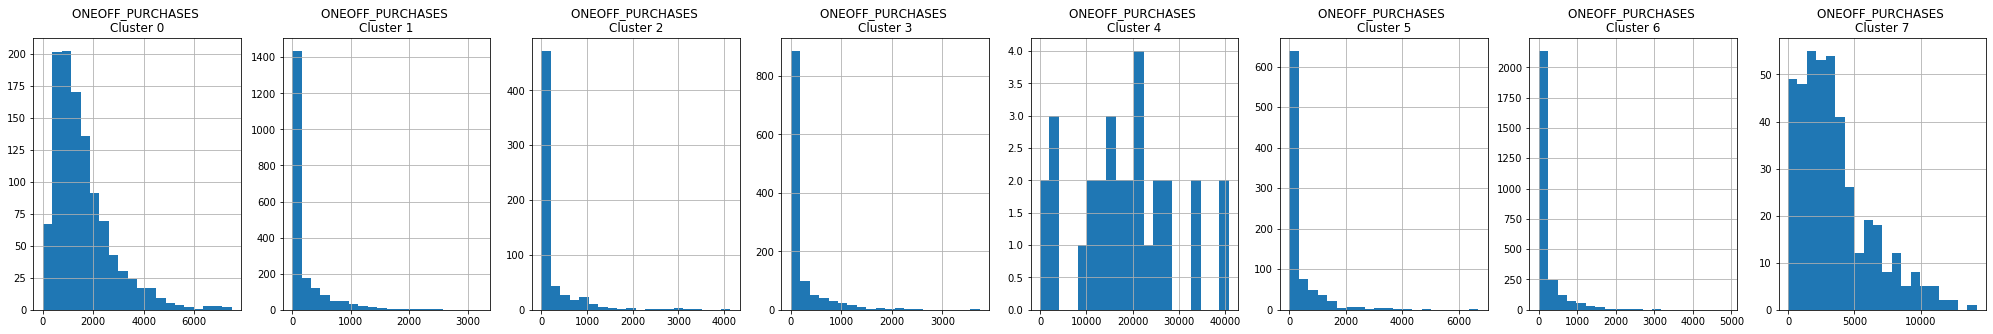

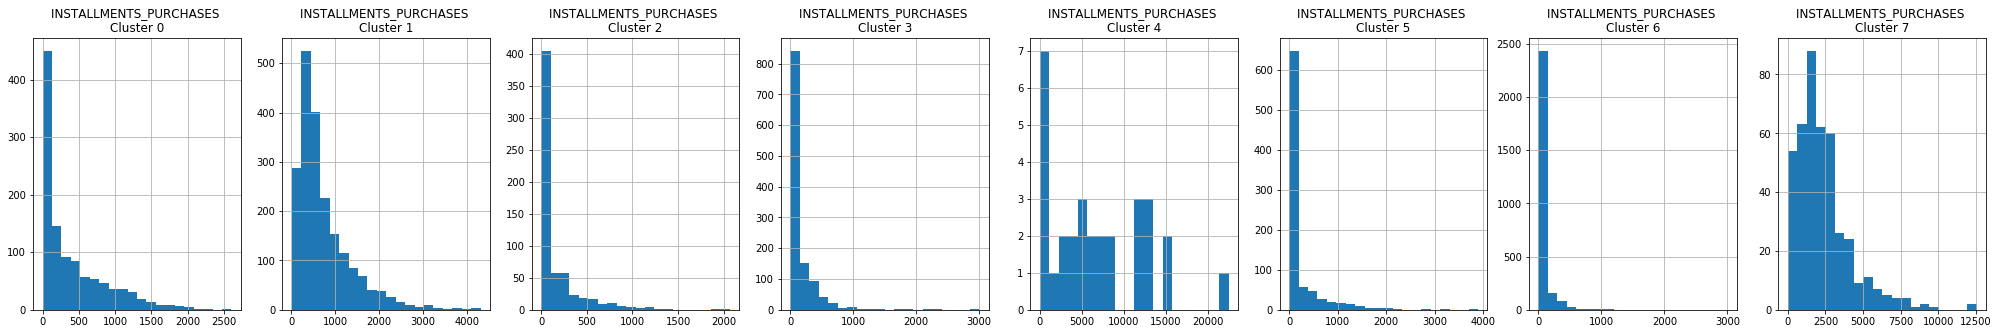

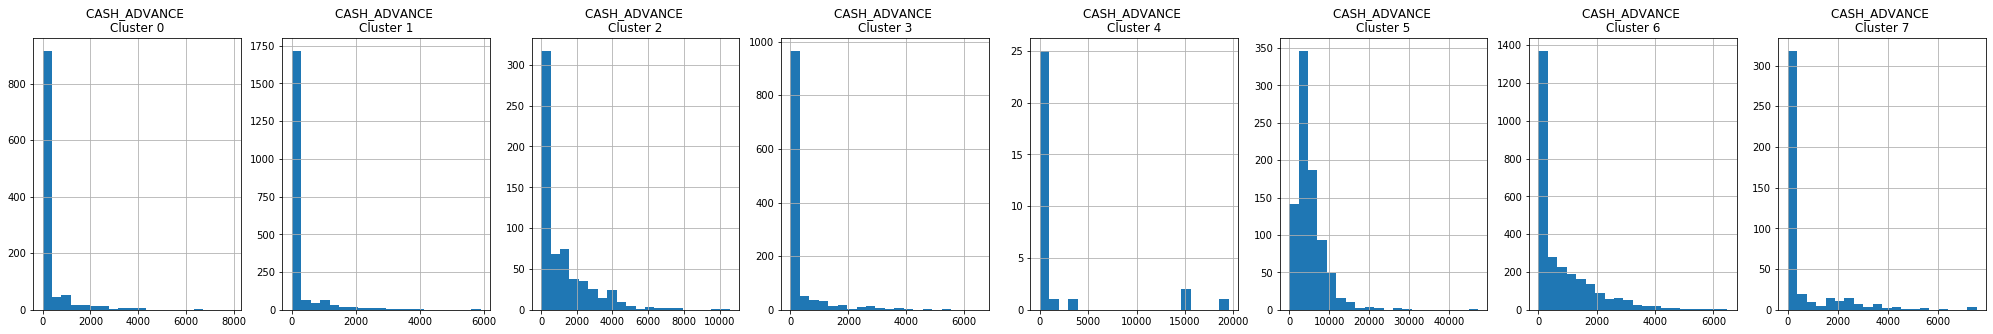

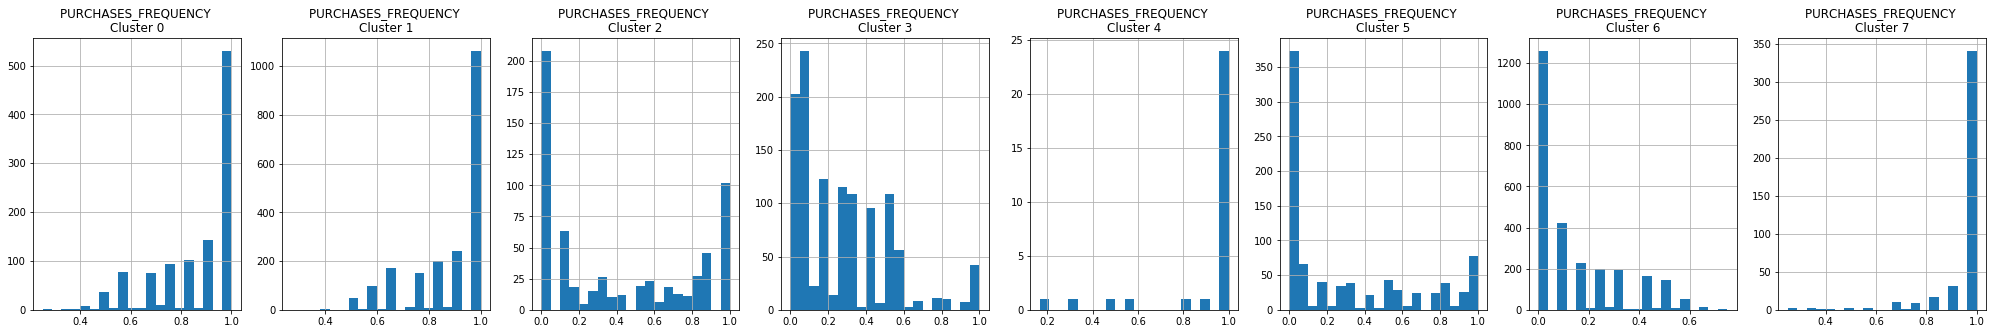

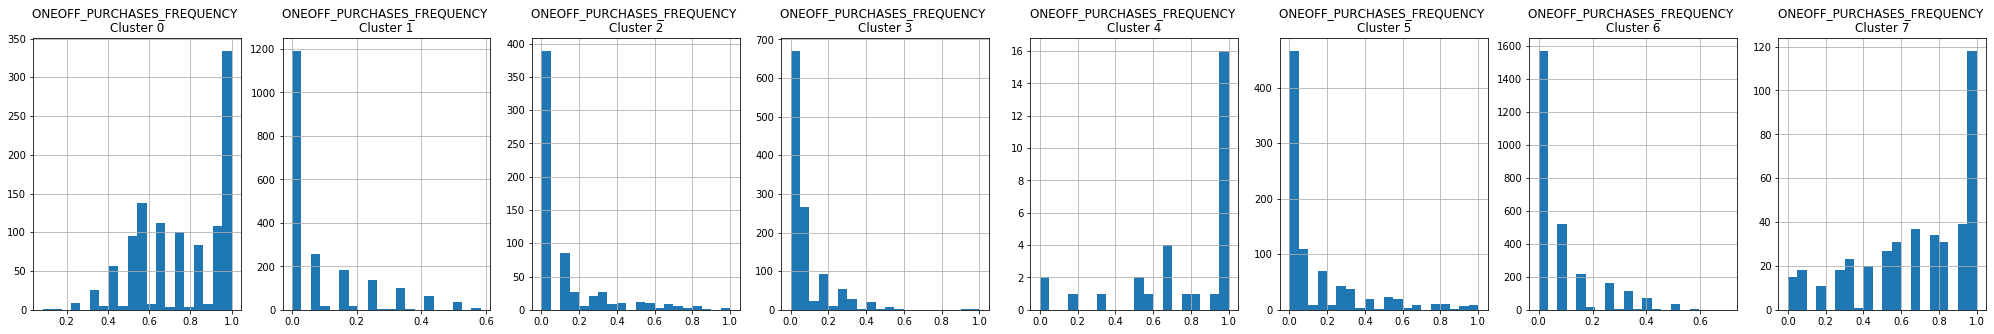

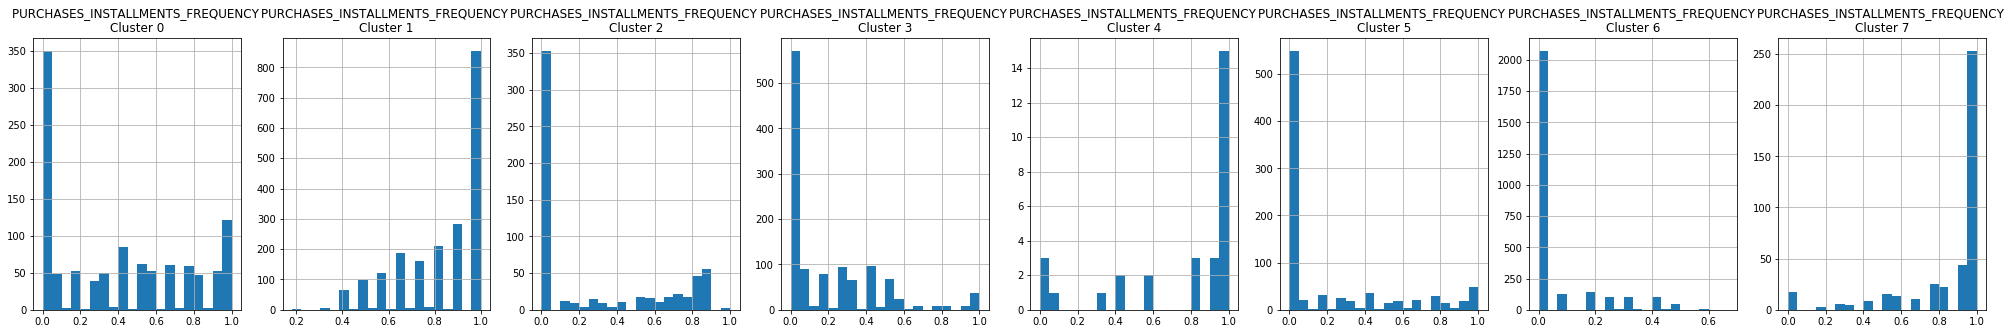

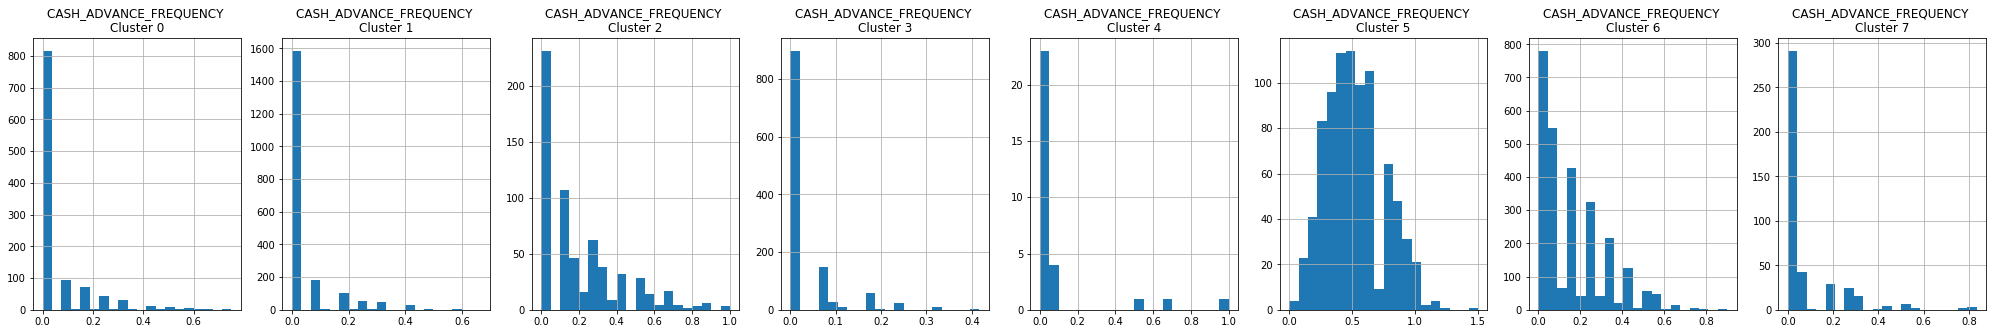

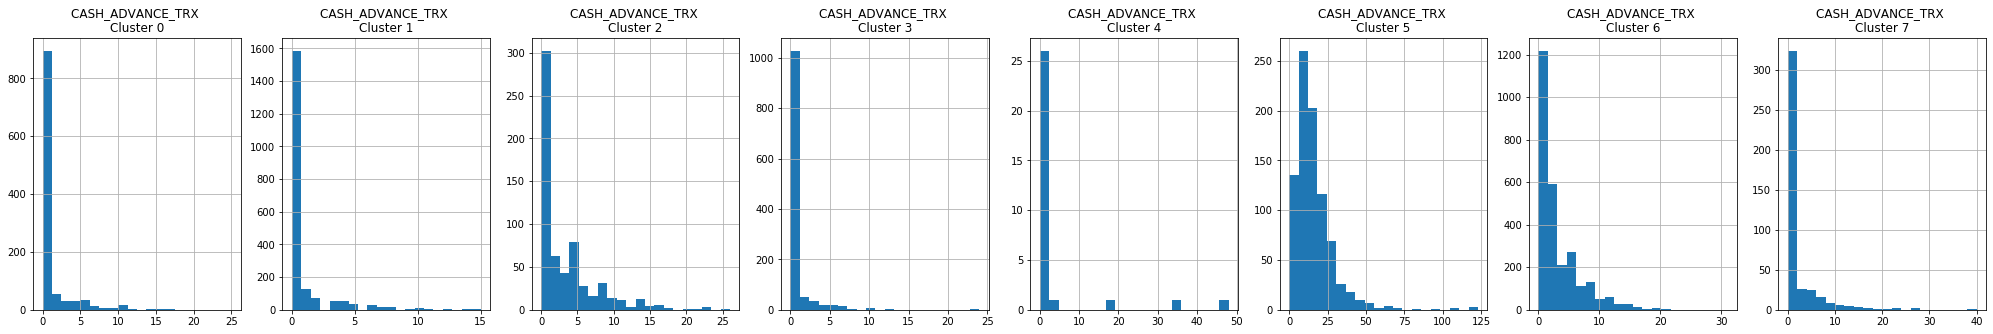

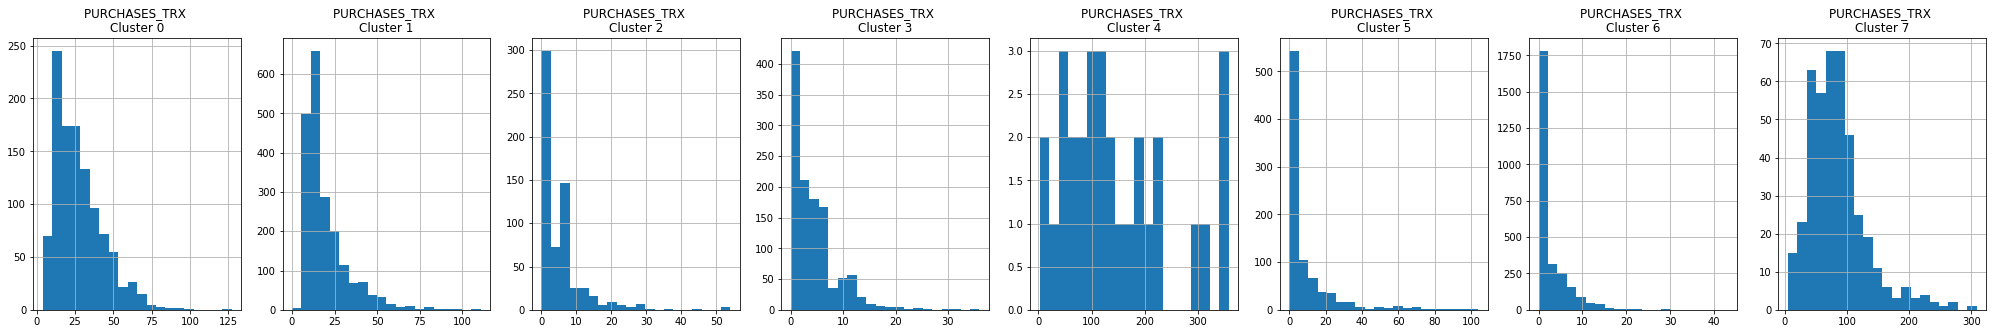

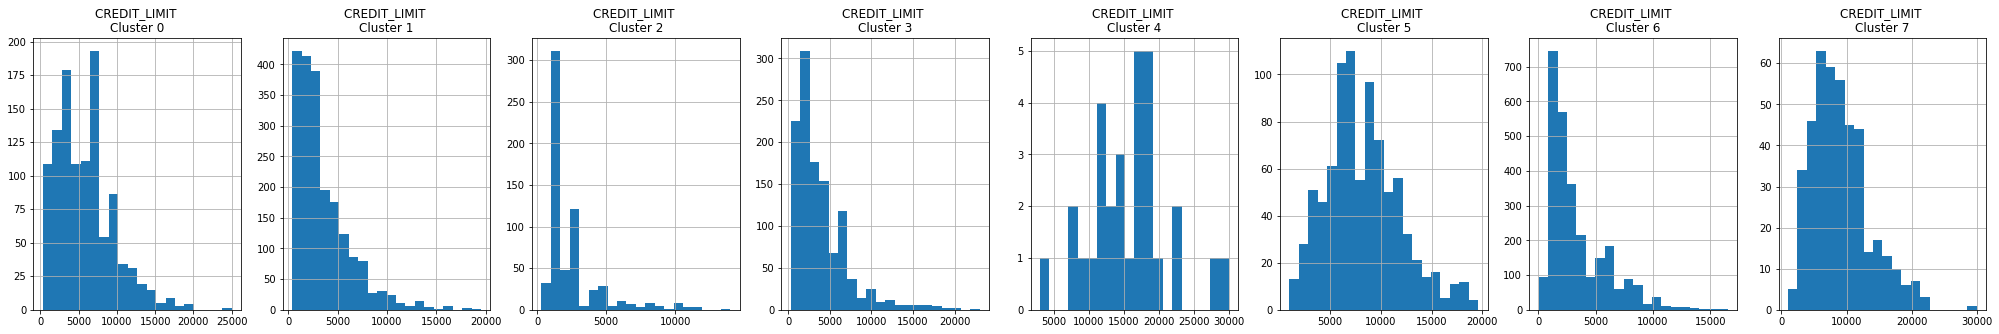

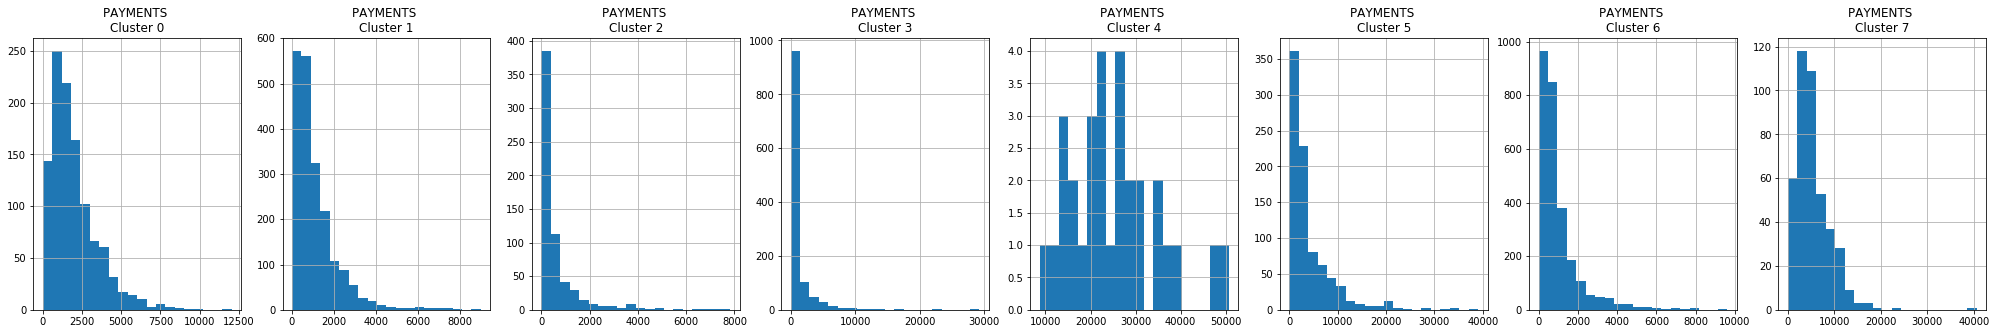

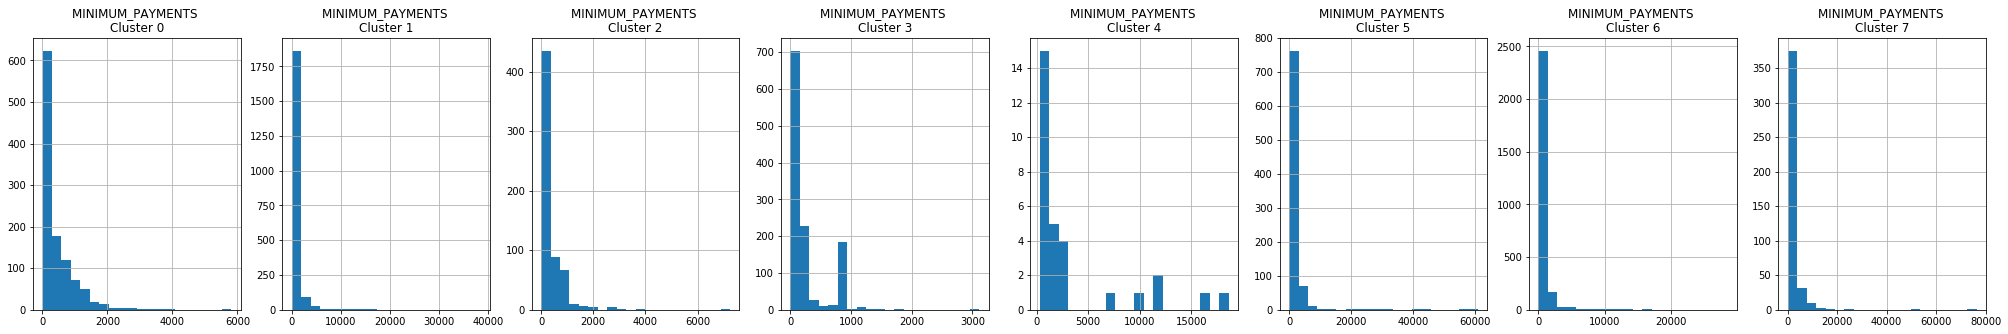

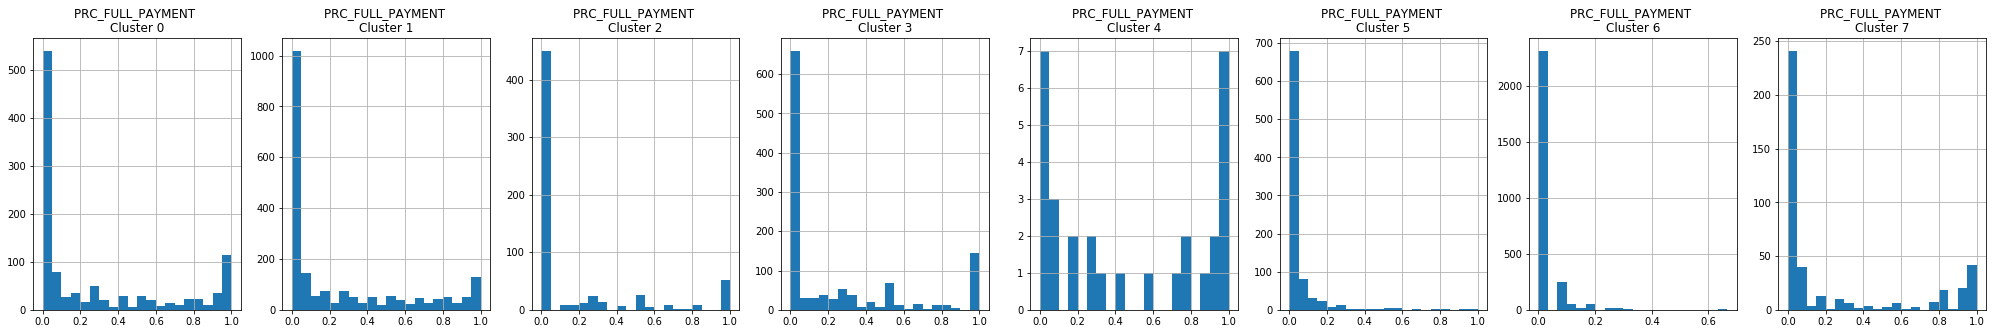

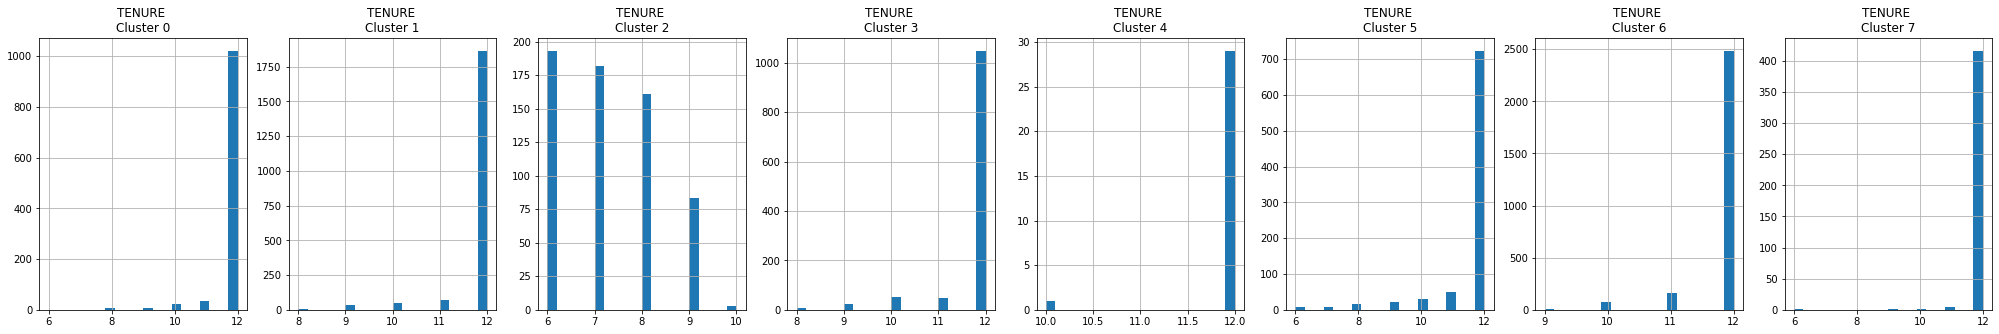

In [35]:
# Plot the histogram of the the variables for each of the clusters (17 columns each having 8 plots)
for i in market.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=market_cluster[market_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i,j))
        
plt.show()

---

## Apply PCA and Visualize the results

In [36]:
# Obtain the Principal components
pca= PCA(n_components=2)
pri_comp= pca.fit_transform(market_scaled)
pri_comp

array([[-1.68221935, -1.07645481],
       [-1.13829174,  2.50646196],
       [ 0.96968401, -0.38351269],
       ...,
       [-0.92620409, -1.81078346],
       [-2.33655297, -0.65796196],
       [-0.55642457, -0.40045531]])

In [37]:
# Create a data frame with the two Principal components
pca_df= pd.DataFrame(data=pri_comp, columns=['PC1', 'PC2'])
pca_df.head(3)

,PC1,PC2
0,-1.682219,-1.076455
1,-1.138292,2.506462
2,0.969684,-0.383513


In [38]:
# Concatenate the cluster labels to the pca data frame
pca_df= pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head(3)

,PC1,PC2,cluster
0,-1.682219,-1.076455,6
1,-1.138292,2.506462,5
2,0.969684,-0.383513,0


Text(0.5, 1.0, 'Plot of the two principal components')

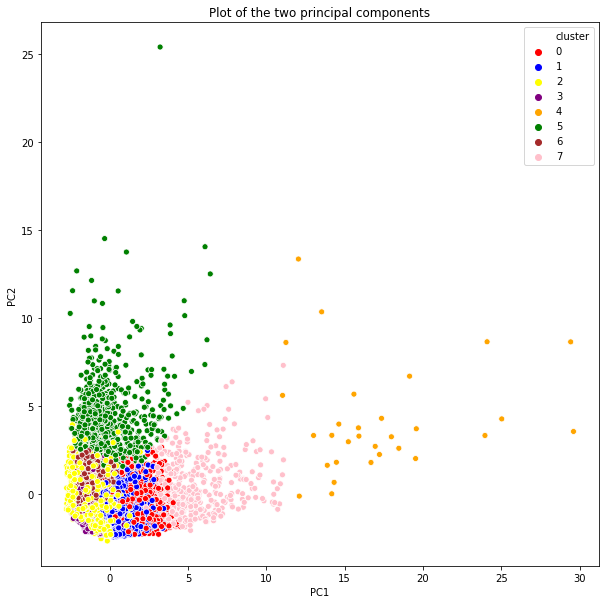

In [39]:
# Plot the principal components
plt.figure(figsize=(10,10))
pca_plot=sns.scatterplot( 'PC1', 'PC2', data=pca_df, hue='cluster', palette=['red', 'blue', 'yellow', 'purple', 'orange','green','brown','pink'] )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot of the two principal components')

---

## Dimensionality Reduction Using Autoencoders

Since we have huge amount of data, deep learning might help in imroving the performance of our segmentation task. Autoencoders are an efficient Unsupervised dimensionality reduction tool, especially when the data consists of dependent variables (columns) with inherent correlation among them. Autoencoders perform poorly if all the variables turn out to be dependent.

---

### Import libraries to build and train the Autoencoder

In [40]:
from tensorflow.keras.layers import Dense, Input, Add, Conv2D, BatchNormalization, Flatten, AveragePooling2D, MaxPooling2D, \
                                    Activation, ZeroPadding2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform #Normal initializer;draws samples from truncated normal distributn
from tensorflow.keras.optimizers import SGD

## Building the Autoencoder

In [41]:
input_df= Input(shape=(17,))

# Build the encoders
x= Dense(7, activation='relu')(input_df)       # First layer of the encoder
x= Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x) #First hidden layer of the encoder
x= Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x= Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)


In [42]:
# Build the deep input layer
input_df= Input(shape=(17,))

x=Dense(7, activation='relu')(input_df)     # First layer of the encoder
x= Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)   # First hidden layer of the encoder
x= Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x= Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded= Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x) # Last encoder layer

x= Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)  # First layer of decoder
x= Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)   

decoded= Dense(17, kernel_initializer='glorot_uniform')(x) # Last decoder layer or Output layer

# Full Autoencoder model
autoencoder= Model(input_df, decoded)

# Overall encoder
encoder= Model(input_df, encoded)

In [43]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# Fit the autoencoder model to our training data (with same input and output)
autoencoder.fit(market_scaled, market_scaled, batch_size=128, epochs=25, verbose=1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 3s 345us/sample - loss: 0.4604
Epoch 2/25
8950/8950 [==============================] - 3s 290us/sample - loss: 0.2103
Epoch 3/25
8950/8950 [==============================] - 3s 292us/sample - loss: 0.1601
Epoch 4/25
8950/8950 [==============================] - 3s 297us/sample - loss: 0.1564
Epoch 5/25
8950/8950 [==============================] - 3s 302us/sample - loss: 0.1319
Epoch 6/25
8950/8950 [==============================] - 3s 298us/sample - loss: 0.1084
Epoch 7/25
8950/8950 [==============================] - 3s 299us/sample - loss: 0.0999
Epoch 8/25
8950/8950 [==============================] - 3s 300us/sample - loss: 0.0924
Epoch 9/25
8950/8950 [==============================] - 3s 302us/sample - loss: 0.0951
Epoch 10/25
8950/8950 [==============================] - 3s 307us/sample - loss: 0.0846
Epoch 11/25
8950/8950 [==============================] - 3s 306us/sample - loss: 0.0982
Epoch 12/25
8950/89

In [45]:
# Summary of the autoencoder
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_5 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               100050

In [48]:
# Predict the segments using only the encoded variables
pred= encoder.predict(market_scaled)

In [50]:
# Look at the dimensions of the encoded data
pred.shape                                   # The dimensionality is reduced to 10 columns from 17

(8950, 10)

### Now we can apply our K-means clustering algorithm to the dimensionality reduced data obtained from the autoencoder

---

## Find Optimal Number of Clusters for Autoencoded Dimensionality Reduced Data

In [90]:
scores = []

for i in range(1,20):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores.append(kmeans.inertia_)            # kmeans.inertia_ method minimizes the WCSS    

Text(0, 0.5, 'WCSS Score')

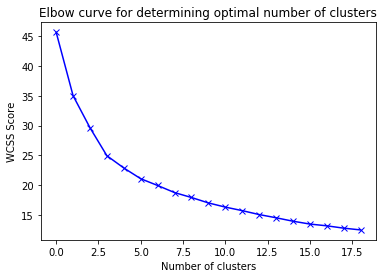

In [91]:
# Plot the elbow curve to determine the optimal number of clusters
plt.plot(scores, 'bx-')                 # Blue color applied to data,x with dashed lines
plt.title("Elbow curve for determining optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS Score")

In [92]:
kmeans= KMeans(4)
kmeans.fit_transform(pred)
labels= kmeans.labels_

In [93]:
labels

array([1, 0, 1, ..., 3, 3, 1])

In [94]:
labels.shape

(8950,)

In [95]:
# Get the maximum and minimum of labels
labels.max(), labels.min()

(3, 0)

In [96]:
# Get the dimensions of the k-clusters
kmeans.cluster_centers_.shape

(4, 10)

In [97]:
# Concatenate the labels of clusters with our original data
market_auto= pd.concat([market, pd.DataFrame({'cluster':labels})], axis=1)
market_auto.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


---

## Apply PCA to the Autoencoded Data

In [98]:
pca= PCA(2)
pri_comp=pca.fit_transform(pred)
pca_df= pd.DataFrame(data=pri_comp, columns=['PC1', 'PC2'])

In [99]:
# Concatenate the cluster labels with PCA reduced data
pca_df= pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,PC1,PC2,cluster
0,0.006393,-0.021450,1
1,-0.030742,0.039860,0
2,-0.039842,0.000310,1
3,-0.033393,0.039291,0
4,-0.022744,-0.018487,1
...,...,...,...
8945,0.091648,-0.027838,3
8946,0.102956,-0.027358,3
8947,0.089235,-0.026217,3
8948,0.027677,-0.020399,3


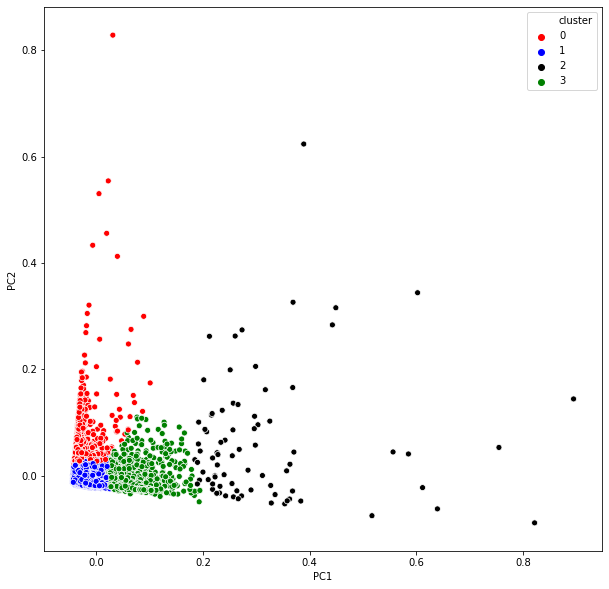

In [100]:
# Plot the PCA results
plt.figure(figsize=(10,10))
pca_plot= sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette=['red','blue','black','green'])